<br>
    <h1 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #e6e6ff ; color :  #17202a ; text-align: center; border-radius: 80px 80px;">CAPSTONE PROJECT - FAKE BILLS PREDICTION</h1>
<br>

# Table of Contents:


* ### [Introduction](#introduction)

* ### [Handling Numerical Data](#cat_data)

* ### [Features](#feature)

* ### [Modeling](#modeling)

* ### [Saving The Final Model](#model)

## Introduction: <a class="anchor" id="introduction"></a>

A Dataset 1500 bills measurement to try to predict fake bills

The dataset includes 1500 rows and 7 columns:

1. is_genuine: boolean

2. diagonal: float

3. height_left: float

4. height_right: float

5. margin_low: float

6. margin_upper: float

7. length: float

### Let's dive into it...

#### Import necessary libraries

In [1]:
#import python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import algorithms to use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

#library for splitting data into train and test

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

#library for cross validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#### Read "fake_bills.csv" dataset

In [2]:
dataset = pd.read_csv("fake_bills.csv", sep = ";")

#### First five rows

In [3]:
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


#### last five rows

In [4]:
dataset.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


#### View information about dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
dataset.margin_low.describe()

count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

## Handling Numerical Data: <a class="anchor" id="cat_data"></a>

In [7]:
##let's look at the central tendency of this column

mean_dataset = dataset['margin_low'].mean()
med_dataset = dataset['margin_low'].median()
mode_dataset = dataset['margin_low'].mode()
print(mean_dataset)
print(med_dataset)
print(mode_dataset[0])

4.485967190704033
4.31
4.08


In [8]:
# fill nul;l values using medium of the given column

dataset['margin_low'].fillna(med_dataset, axis = 0, inplace = True)

In [9]:
# replace values True and False w.r.t 0 and 1

dataset['is_genuine'] = dataset['is_genuine'].replace({True: 1, False: 0})

In [10]:
dataset['is_genuine'].nunique()

2

In [11]:
# set the column index to last

dataset = dataset[[col for col in dataset if col != 'is_genuine'] + ['is_genuine']]

In [12]:
dataset.sample(5)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
258,171.71,103.53,103.78,3.89,3.03,113.51,1
425,171.91,103.97,103.98,4.23,3.01,112.98,1
1318,171.91,103.99,104.23,5.01,3.42,111.77,0
633,172.40,104.19,103.98,4.08,2.93,113.44,1
814,171.87,103.94,103.22,3.71,3.09,113.19,1


In [13]:
dataset.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
is_genuine      0
dtype: int64

### Univariate Analysis

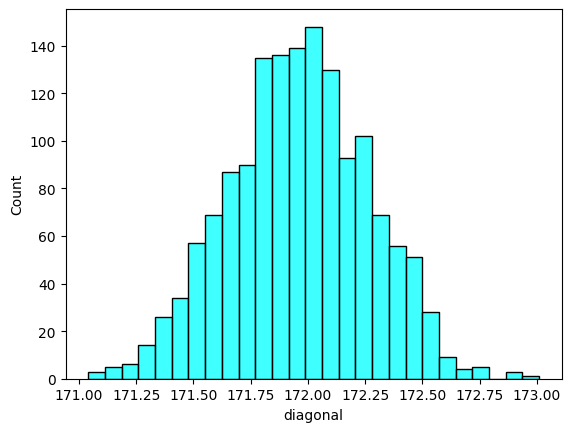

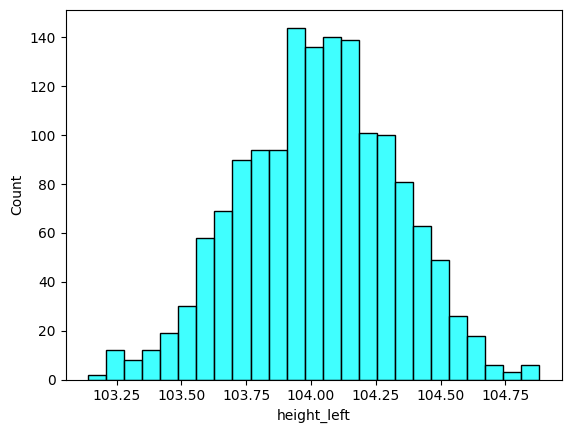

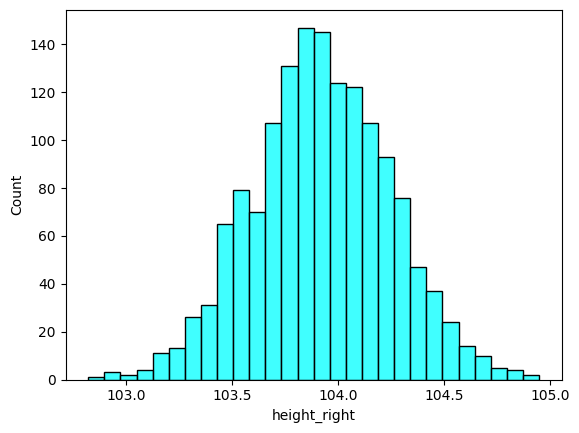

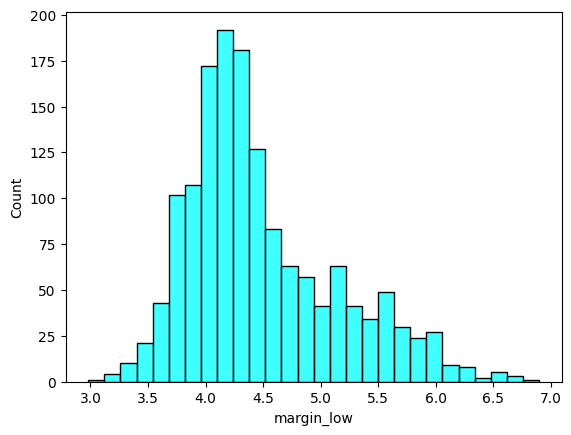

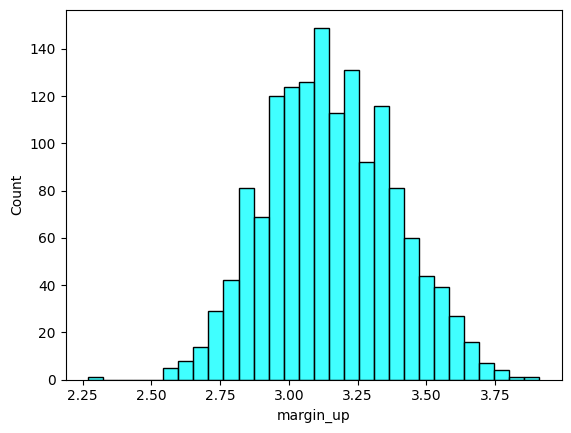

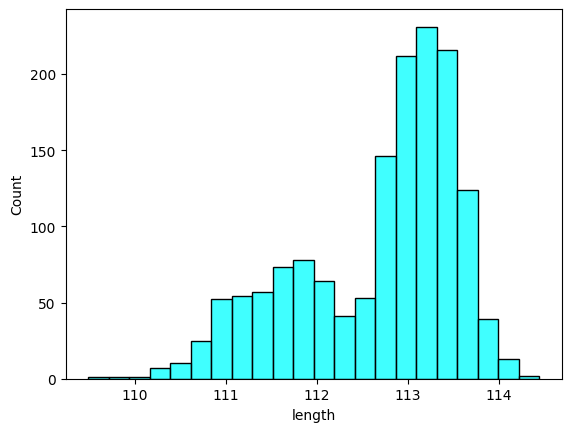

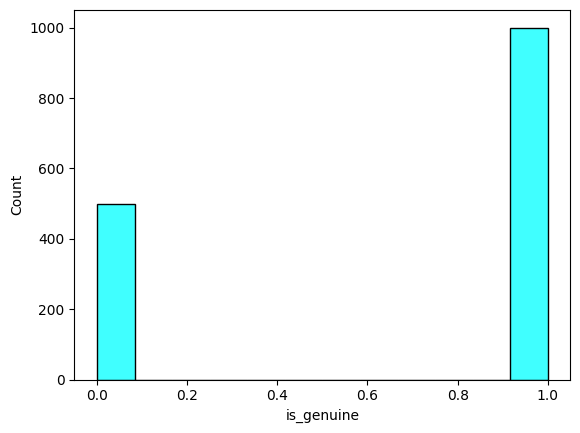

In [14]:
for i in dataset.columns:
    sns.histplot(x = dataset[i], color = "cyan")
    plt.show()

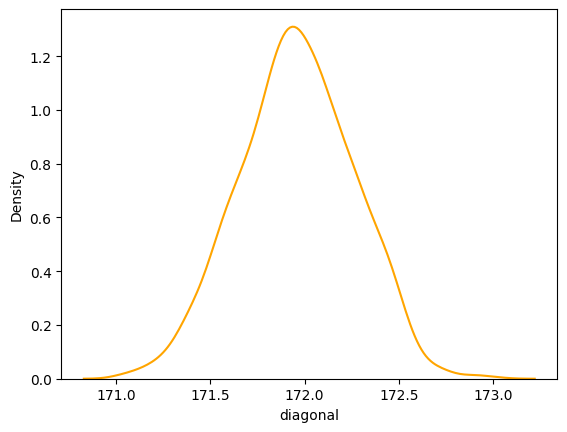

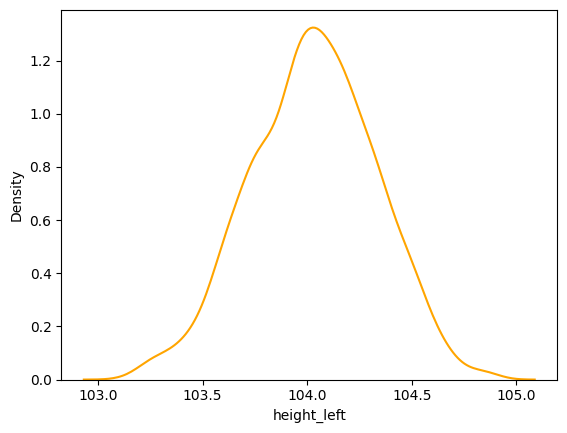

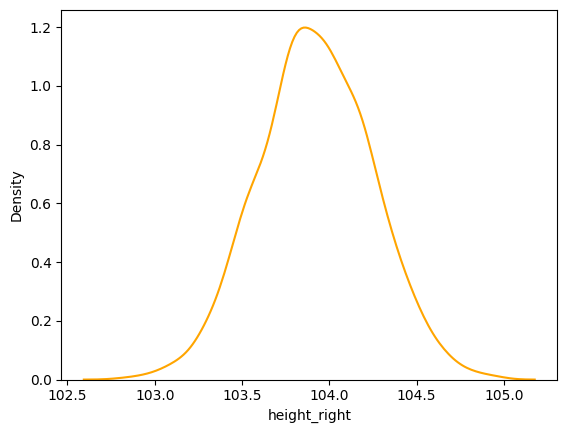

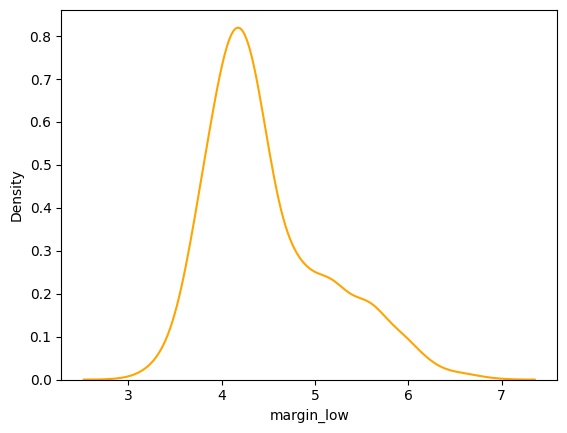

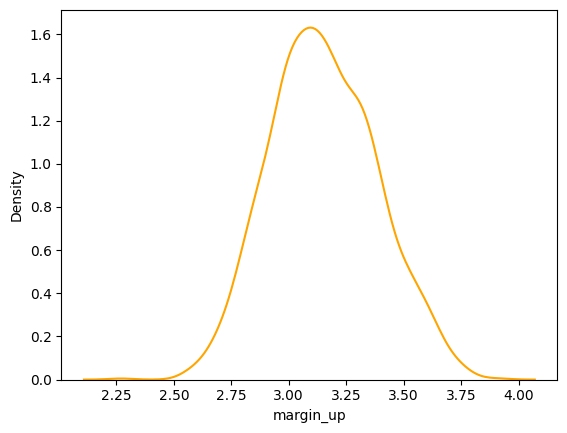

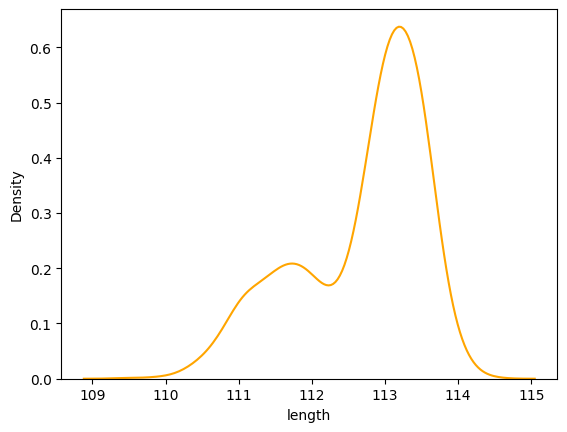

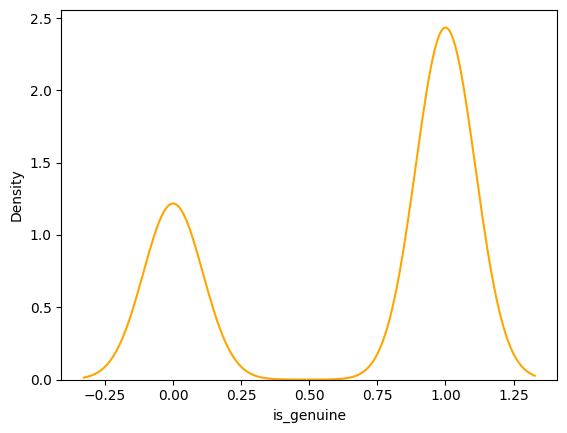

In [15]:
for i in dataset.columns:
    sns.kdeplot(x = dataset[i], color = "orange")
    plt.show()

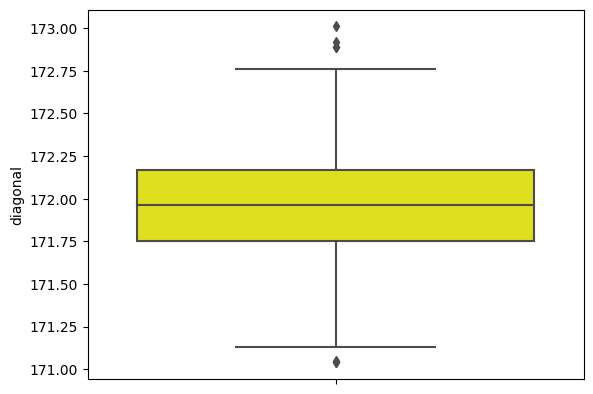

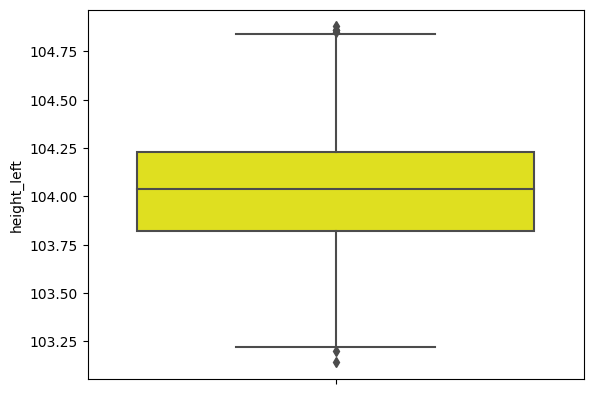

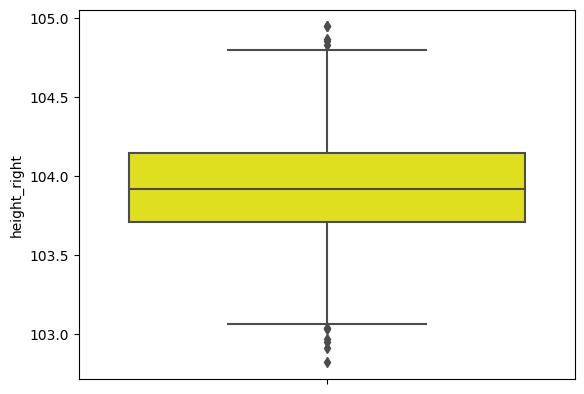

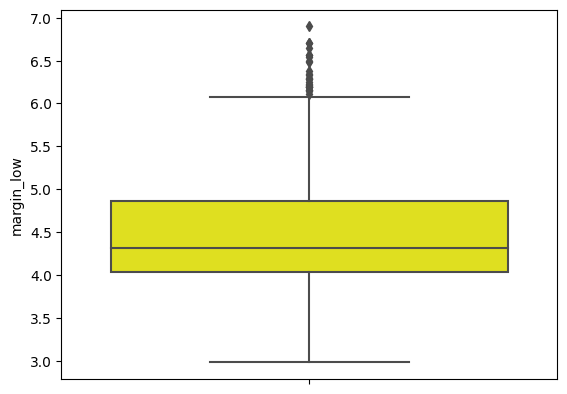

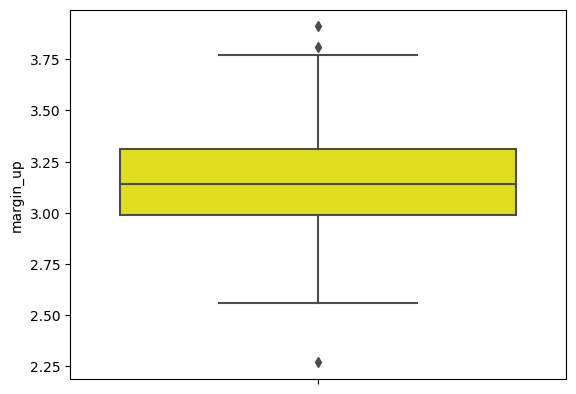

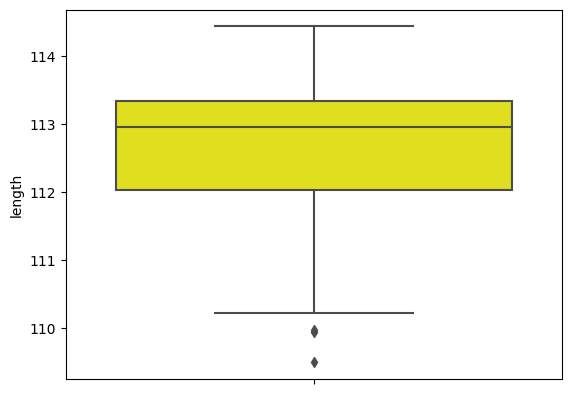

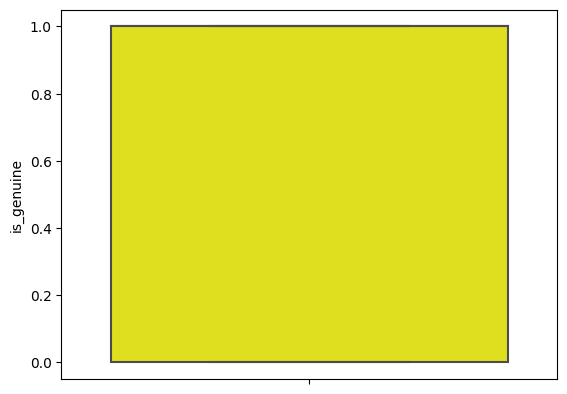

In [16]:
for i in dataset.columns:
    sns.boxplot(y = dataset[i], color = "yellow")
    plt.show()

In [17]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [18]:
for col in dataset.columns:
        LL, UL = outlier_limit(dataset[col])
        dataset[col] = np.where((dataset[col] > UL) | (dataset[col] < LL), np.nan, dataset[col])

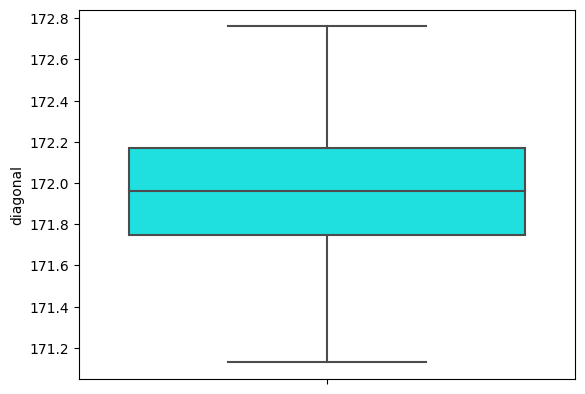

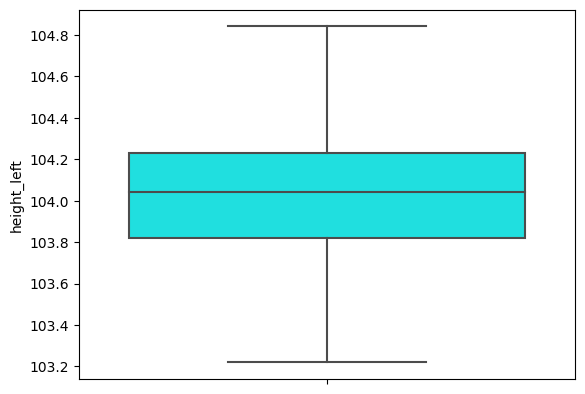

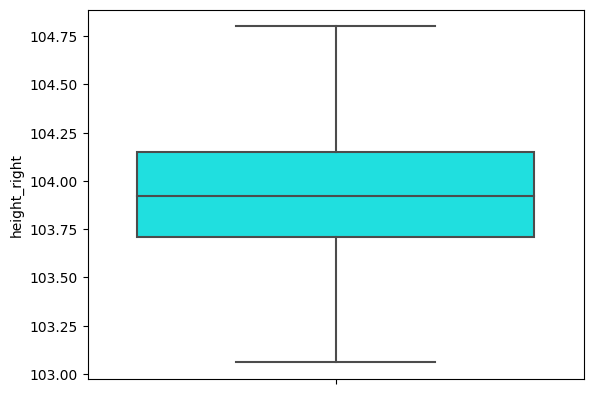

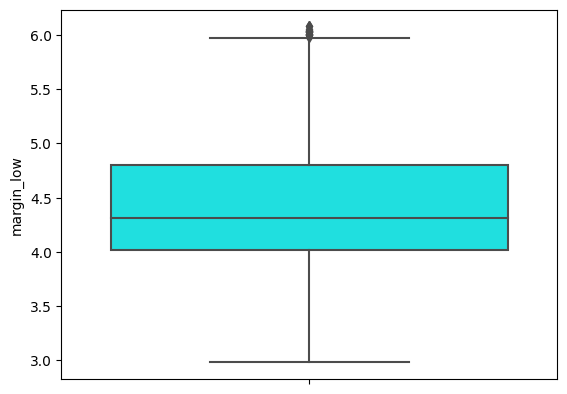

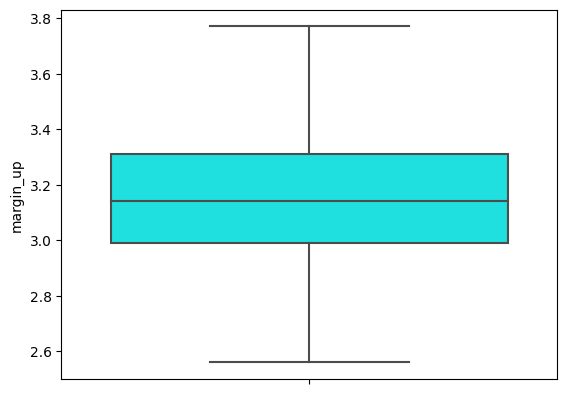

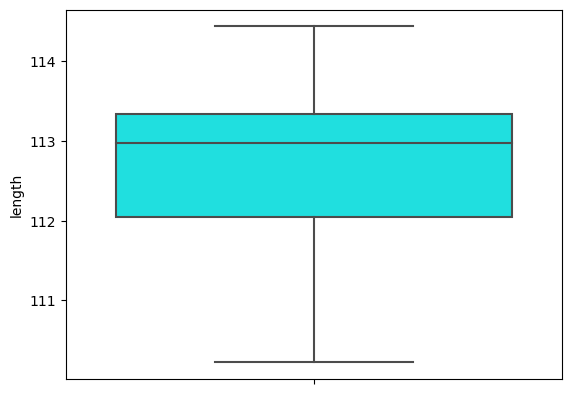

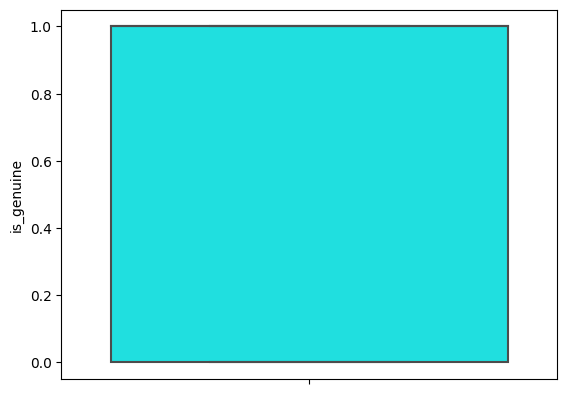

In [19]:
for i in dataset.columns:
        sns.boxplot(y = dataset[i], color = "cyan")
        plt.show();

In [20]:
# check any null values

dataset.isnull().sum()

diagonal         7
height_left      6
height_right    11
margin_low      26
margin_up        3
length           3
is_genuine       0
dtype: int64

In [21]:
# drop the null values

dataset.dropna(inplace = True)

In [22]:
# again check for null values

dataset.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
is_genuine      0
dtype: int64

In [23]:
# find shape after data preprocessing

dataset.shape

(1445, 7)

<AxesSubplot: >

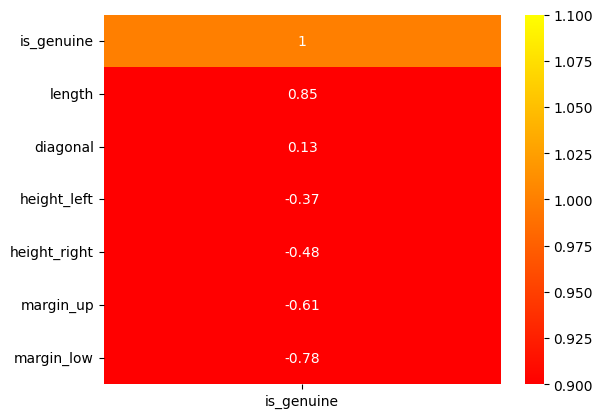

In [24]:
# plot the heatmap

sns.heatmap(dataset.corr()[["is_genuine"]].sort_values(by = "is_genuine", ascending = False), vmin = 1, vmax = 1, annot = True, cmap = "autumn")

## Features: <a class="anchor" id="feature"></a>

In [25]:
#Splitting data into training and test set

x = dataset.drop(['is_genuine'], axis = 1)
y = dataset['is_genuine']

In [26]:
#scaling the data set

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [27]:
#split into train and test set

x_train, x_test, y_train , y_test= train_test_split(x, y, test_size = 0.3, random_state = 1)

## Models: <a class="anchor" id="modeling"></a>

In [28]:
models = {
    "KNN" : KNeighborsClassifier(n_neighbors =5),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest Classification" : RandomForestClassifier(random_state=1),
    "Decision Tree Classification" : DecisionTreeClassifier(random_state =1),
}

Model we choose be: KNN
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       129
         1.0       0.98      0.99      0.99       305

    accuracy                           0.98       434
   macro avg       0.98      0.98      0.98       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.11 %


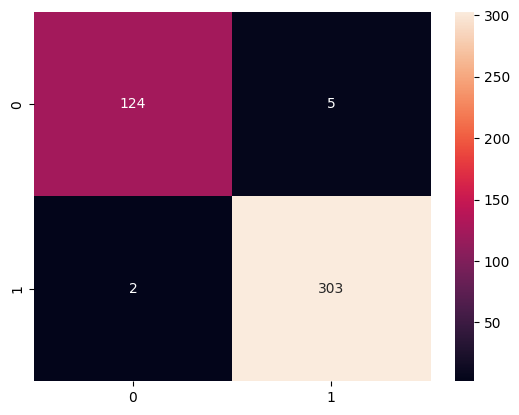

Model we choose be: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       129
         1.0       0.99      0.99      0.99       305

    accuracy                           0.99       434
   macro avg       0.99      0.98      0.98       434
weighted avg       0.99      0.99      0.99       434

Accuracy: 99.21 %


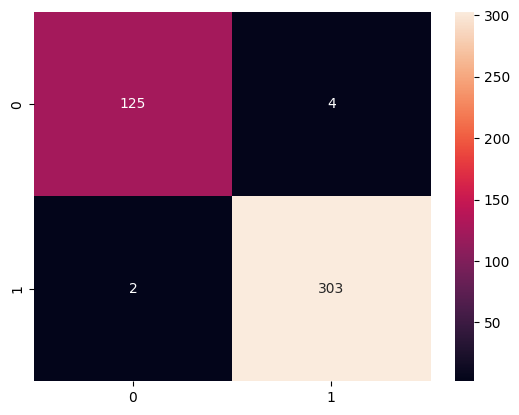

Model we choose be: Random Forest Classification
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       129
         1.0       0.98      0.98      0.98       305

    accuracy                           0.98       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.31 %


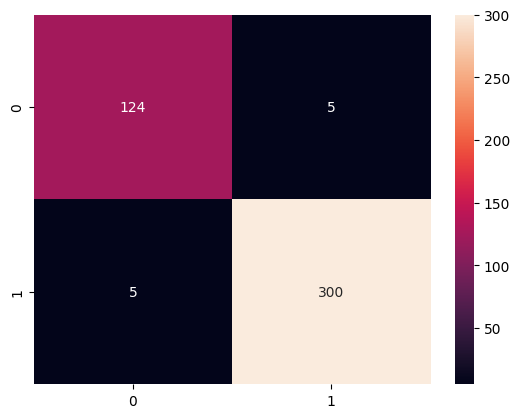

Model we choose be: Decision Tree Classification
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       129
         1.0       0.98      0.98      0.98       305

    accuracy                           0.98       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.01 %


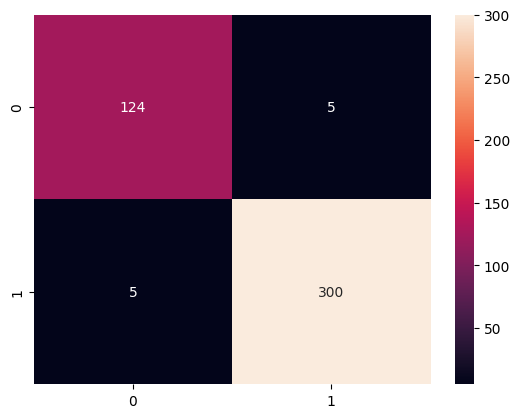

In [29]:
for name, model in models.items():
    print(f"Model we choose be: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print("Accuracy: {:.2f} %".format(scores.mean() * 100))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
    plt.show()

## Saving the Final Model: <a class="anchor" id="model"></a>

In [30]:
model = RandomForestClassifier(random_state=1)

In [31]:
import sklearn.metrics as metrics

model used is :: RandomForestClassifier(random_state=1)


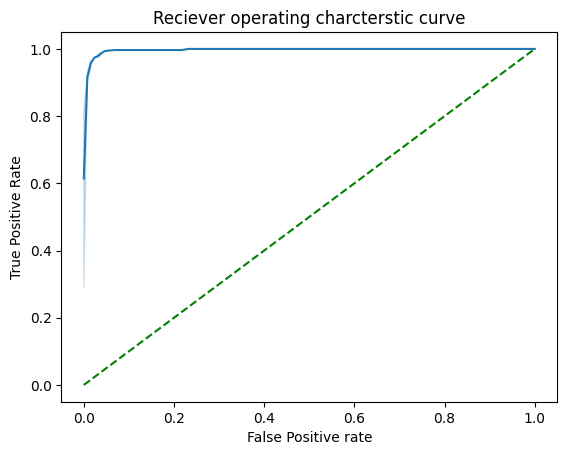

In [32]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()